# King County Real Estate Project

## Business Understanding

For this project, I have been retained by the leadership of a startup online real estate analytics firm, BCF, LLC ('BCF'). BCF has requested advice for one of its newest clients, a small well established local real estate broker from the King County region of Washington State, located in the Ballard neighborhood of Seattle ('Client'). Client has a large crew of seasoned real estate agents, loan officers, lead generation experts, and other sales supply chain specialists.  Client is currently exploring ideas to scale its business in the King County region and keep pace with newer, more technologically advanced companies. 

Toward this end, Client wants to obtain better data insights by better leveraging the abundance of real estate data available.  Client has approached BCF for an analytical and scientific perpective on what drives residential real estate sales in King County so that it can provide actionable reference points for its relentless 'direct to consumer' sales team. Client is requesting a multivariate regression analysis of the King County real estate market, with `price` being the primary dependent variable.  Client is not interested in the total square footage of living space and has requested that the analysis ignore `sqft_living` as an independent variable. 

## Data and Methodology


Data for this analysis was taken from three different datasets.  The intitial 'given' data provided by BCF is a messy King County dataset with information scraped from the [King County Assessor's website](https://data.kingcounty.gov/Property-Assessments/Assessor-Localscape-Portal/2e9i-fa8a) ('Baseline Model Data'). The second dataset was scraped from [ZipDataMaps](https://www.zipdatamaps.com/king-wa-county-zipcodes) ('Zipcode data'). The third and final dataset was taken from the [King County GIS Open Data Site](https://data.kingcounty.gov/County-Operations/King-County-GIS-Open-Data-site/wuuf-xywg) and includes a range of factors that provide information for the final model.

The initial baseline regression model was built utilizing the base dataset. The second model iteration was built using the

-what each record represents
-which column is begin used as the regress

## Data Preparation and EDA

### Loading the Data

In [1442]:

#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

In [1443]:
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
# %matplotlib inline

 # section_1

[section_3](#section_3)
[section_2](#section_2)

In [1444]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [1445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [1446]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [1447]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

In [1448]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

In [1449]:
df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

In [1450]:
df['Zipcode'] = df['Zipcode'].astype(int)

<AxesSubplot:>

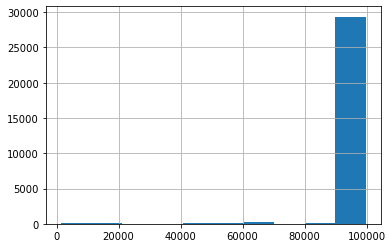

In [1451]:
df['Zipcode'].hist()

In [1452]:
# controling for outliers
df = df.loc[(df['Zipcode'] > 98000) & (df['Zipcode'] <= 98922)]

In [1453]:
df.Zipcode.nunique()

88

### Renaming Selldate

In [1454]:
# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

## Engineering Yr_Old

In [1455]:
# creating a year old column
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [1456]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old
count,2.924100e+04,29241.000000,29241.000000,29241.000000,2.924100e+04,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000
mean,1.112620e+06,3.435040,2.332239,2130.756643,1.719192e+04,1.517151,1825.820423,480.763654,336.275811,216.363599,1973.878458,93.764304,47.543109,-122.214209,98077.684826,44.741698
std,8.953389e+05,0.978861,0.895780,977.344954,6.125879e+04,0.548585,880.729276,585.935636,286.199465,246.749571,31.684861,422.616958,0.147563,0.143653,55.267033,31.007476
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,98001.000000,-1.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430065,-122.328290,98032.000000,18.000000
50%,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557680,-122.234070,98059.000000,43.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078000e+04,2.000000,2290.000000,960.000000,510.000000,310.000000,2001.000000,0.000000,47.672045,-122.127475,98117.000000,66.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98663.000000,122.000000


In [1457]:
# controlling for dates where house was sold after renovation
df.loc[df['yr_old'] < 0, 'yr_old'] = 0

In [1458]:
df.yr_old.value_counts()

0      1368
1       664
44      504
54      478
16      468
       ... 
89       32
87       31
119      30
88       30
120      27
Name: yr_old, Length: 123, dtype: int64

### Data Cleaning

In [1459]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001026
sewer_system     0.000445
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
dtype: float64

In [1460]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

## Target distribution

This baseline model is limited to both discrete and continuous numeric predictors.  

Based on the Mean Absolute Error ('MAE'), overall this baseline model is off by about an average of $338,488.68 for any given prediction. This calculation is the mean absolute (regardless of whether it is positve or negative) distance of all errors.   

The intercept is extremely negative, at minus 9 to the 7th power.  

The coefficient for `sqft_living` tells us that for each increase of square foot living space, we see an associated increase in saleprice of about $327.83 dollars.  

In [1461]:
df.corr()['price']

price            1.000000
bedrooms         0.290994
bathrooms        0.488039
sqft_living      0.616741
sqft_lot         0.086790
floors           0.199285
sqft_above       0.546108
sqft_basement    0.246548
sqft_garage      0.267477
sqft_patio       0.317623
yr_built         0.105877
yr_renovated     0.085506
lat              0.296212
long             0.081940
Zipcode         -0.105275
yr_old          -0.137946
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

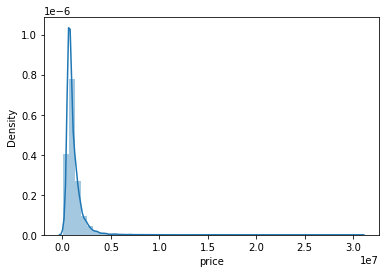

In [1462]:
sns.distplot(df['price'])

`sqft_living` is the most highly correlated feature in the baseline numeric model.  

Price is the singular dependent variable in our model.  

## Modeling

In [1463]:
# Creating categorical variables
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'grade']]

### Baseline Model

In [1464]:
pred_cols = [x for x in df.columns if x not in cats1]

In [1465]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old']

In [1466]:
# create baseline model
preds = df[pred_cols]
target = df['price']

In [1467]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [1468]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1954.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:58:36   Log-Likelihood:            -4.3197e+05
No. Observations:               29200   AIC:                         8.640e+05
Df Residuals:                   29185   BIC:                         8.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.313e+07   4.25e+06    -21.912      0.000   -1.01e+08   -8.48e+07
bedrooms      -1.394e+05   5195.248    -26.833      0.000    -1.5e+05   -1.29e+05
bathrooms      1.179e+05   7701.917     15.305      0.000    1.03e+05    1.33e+05
sqft_living     327.7250     17.255     18.994      0.000     293.905     361.545
sqft_lot          0.1948      0.064      3.025      0.002       0.069       0.321
floors        -9.492e+04   9788.544     -9.697      0.000   -1.14e+05   -7.57e+04
sqft_above      295.6770     17.616     16.784      0.000     261.148     330.206
sqft_basement    82.4744     13.093      6.299      0.000      56.811     108.138
sqft_garage     -35.3134     18.315     -1.928      0.054     -71.211       0.584
sqft_patio      262.0396     17.058     15.362      0.000     228.606     295.474
yr_built       2725.5026    727.737      3.745      0.000    1299.104    4151.901
yr_renovated    203.0562     23.012      8.824      0.000     157.952     248.161
lat            1.535e+06   2.69e+04     57.063      0.000    1.48e+06    1.59e+06
long          -1.199e+05   3.11e+04     -3.859      0.000   -1.81e+05    -5.9e+04
yr_old         4842.8398    731.818      6.618      0.000    3408.443    6277.236
==============================================================================
Omnibus:                    45281.582   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77556338.212
Skew:                           9.388   Prob(JB):                         0.00
Kurtosis:                     254.779   Cond. No.                     7.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1469]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

338894.08774805674

In [1470]:
scaler = StandardScaler()

In [1471]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_old
0,0.576638,-1.490446,-0.974356,-0.164054,-0.942645,-0.734428,-0.821246,-1.176044,-0.714944,-0.154056,-0.221693,-0.550317,0.167048,0.266455
1,1.600278,0.186514,0.653580,-0.171241,-0.942645,-0.291295,1.857512,-1.176044,0.095623,-0.753999,-0.221693,1.141355,-0.988523,0.847302
2,2.623917,-0.372473,0.766204,-0.180238,-0.942645,-0.279933,1.874574,-1.176044,-0.877057,-0.564544,-0.221693,-0.278687,-0.075259,0.653686
3,-0.447001,0.745501,0.029026,-0.258462,0.879916,-0.836690,1.004404,-0.477105,0.217208,1.140558,-0.221693,0.155602,-0.529411,-1.088856
4,-1.470640,-0.372473,-1.035788,-0.269021,0.879916,-0.802602,0.117173,0.746037,-0.755472,1.203710,-0.221693,-0.072439,0.995980,-1.153394


In [1472]:
model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
model_scaled.summary()

# X = sm.add_constant(X.values)
# result = sm.OLS(Y.values, X).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1954.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:58:50   Log-Likelihood:            -4.3197e+05
No. Observations:               29200   AIC:                         8.640e+05
Df Residuals:                   29185   BIC:                         8.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.113e+06   3765.893    295.550      0.000    1.11e+06    1.12e+06
bedrooms      -1.362e+05   5075.272    -26.833      0.000   -1.46e+05   -1.26e+05
bathrooms      1.054e+05   6889.177     15.305      0.000    9.19e+04    1.19e+05
sqft_living    3.201e+05   1.69e+04     18.994      0.000    2.87e+05    3.53e+05
sqft_lot       1.184e+04   3914.830      3.025      0.002    4169.953    1.95e+04
floors        -5.208e+04   5370.763     -9.697      0.000   -6.26e+04   -4.16e+04
sqft_above     2.602e+05   1.55e+04     16.784      0.000     2.3e+05    2.91e+05
sqft_basement  4.834e+04   7673.807      6.299      0.000    3.33e+04    6.34e+04
sqft_garage    -1.01e+04   5240.719     -1.928      0.054   -2.04e+04     167.180
sqft_patio     6.466e+04   4208.843     15.362      0.000    5.64e+04    7.29e+04
yr_built       8.632e+04    2.3e+04      3.745      0.000    4.11e+04    1.31e+05
yr_renovated   8.575e+04   9718.404      8.824      0.000    6.67e+04    1.05e+05
lat            2.265e+05   3969.061     57.063      0.000    2.19e+05    2.34e+05
long          -1.716e+04   4446.417     -3.859      0.000   -2.59e+04   -8442.127
yr_old         1.501e+05   2.27e+04      6.618      0.000    1.06e+05    1.95e+05
==============================================================================
Omnibus:                    45281.582   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77556338.212
Skew:                           9.388   Prob(JB):                         0.00
Kurtosis:                     254.779   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='price', ylabel='Density'>

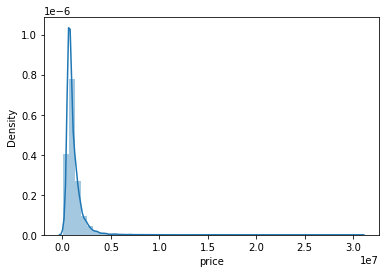

In [1473]:
sns.distplot(df['price'])

# Model # 2

## Merge on zipcode to include neighborhood/population
# section_2

## Bringing in geographic boundaries

In [1474]:
from bs4 import BeautifulSoup
import requests

In [1475]:
resp = requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [1476]:
soup = BeautifulSoup(resp.content)
soup


<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,s=[],r=[],o=!0,a=function(e,i,n,s,r,o,a){var l=this;this.name=e,this.funcName=i,this.parameters=null===n?null:n instanceof Array?n:[n],this.isBlock=s,this.blockedBy=r,this.deleteWhenComplete=o,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.isTimeDelay=!1,this.process=function(){u("... func = "+e),l.isInitialized=!0,l.isComplete=!0,u("... func.apply: "+e);var i=l.funcName.split("."),n=null;i.length>3||(n=3===i.length?window[i[0]][i[1]][i[2]]:2===i.length?window[i[0]][i[1]]:window[l.funcName]),null!=n&&n.apply(null,this.parameters),!0===l.deleteWhenComplete&&delete t[e],!0===l.isBlock&&(u("----- F'D: "+l.name),

In [1477]:
a_tags = soup.find('div', class_='bodycontainer').find_all('a')

In [1478]:
city_names = [a.text for a in a_tags[-57:-25]]

In [1479]:
city_names

['Auburn',
 'Baring',
 'Bellevue',
 'Black Diamond',
 'Bothell',
 'Burton',
 'Carnation',
 'Duvall',
 'Enumclaw',
 'Fall City',
 'Federal Way',
 'Hobart',
 'Issaquah',
 'Kenmore',
 'Kent',
 'Kirkland',
 'Maple Valley',
 'Medina',
 'Mercer Island',
 'North Bend',
 'Pacific',
 'Preston',
 'Ravensdale',
 'Redmond',
 'Renton',
 'Sammamish',
 'Seahurst',
 'Seattle',
 'Skykomish',
 'Snoqualmie',
 'Vashon',
 'Woodinville']

In [1480]:
df['address'].iloc[0].split(", ")[1]

'Renton'

In [1481]:
df['city'] = df['address'].apply(lambda x: x.split(', ')[1])

In [1482]:
df_no_location_outliers = df.loc[df['city'].isin(city_names)]
df_no_location_outliers.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,Zipcode,yr_old,city
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,53,Renton
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,71,Seattle
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,65,Seattle
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,11,Seattle
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,9,Issaquah


In [1483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

<AxesSubplot:>

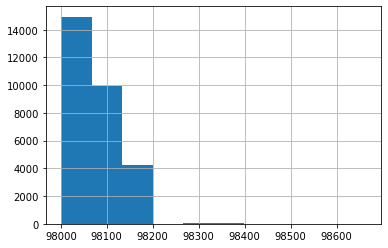

In [1484]:
# Outliers
df['Zipcode'].hist()

In [1485]:
# # reading in Zip/Neighborhood/Population dataset
# df_zip = pd.read_csv('data/kc_zipcode_details.csv', index_col=0)
# df_zip.tail(55)

In [1486]:
# changing index name to match other dataset
# df_zip.index.names = ['Zipcode']

In [1487]:
# df_zip.reset_index(inplace=True)
# df_zip.head()

In [1488]:
# # controlling for outliers
# df_zip = df_zip.loc[(df_zip['Zipcode'] > 98000) & (df_zip['Zipcode'] <= 98288)]

In [1489]:
# df_zip.nunique()


In [1490]:
# df_zip['Zipcode'].nunique()

In [1491]:
# identify missing values in zip code data
# df.isna().sum()/df.shape[0]

In [1492]:
# df_zip.dropna(subset=['Population'], axis=0, inplace=True)

[section_1](#section_1)
[section_3](#section_3)   

In [1493]:
# df1 = df.merge(df_zip, how='left', on='Zipcode')

In [1494]:
# df1.info()

In [1495]:
# identify missing data in new dataset
# df1.isna().sum()/df.shape[0]

In [1496]:
# df1.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [1497]:
# df1.info()

In [1498]:
# no NA/missing values in merged dataset
# df1.isna().sum()/df1.shape[0]

## Protected

The code below was a failed attempt to establish a protected/unprotected feature that would include only homes contained in a greenbelt that likely had some watershed/wildlife/environmental nuisance protection.  It was not correlated with price, nor large enough to be a predictor.  

In [1499]:
# df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES'), 'protected'] = 'protected'
# df1.loc[(df1['nuisance'] != 'YES') | (df1['greenbelt'] != 'YES'), 'protected'] = 'unprotected'

In [1500]:
# df1['protected']

In [1501]:
# df1['protected'].value_counts() 

## Improving upon the baseline

## Standard Scaling

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Grade - a failed attempt at making an Ordinal category numeric

In [1019]:
# df1.grade.value_counts()

In [834]:
# df1.grade.value_counts()

In [835]:
# # grade_map = {
#     "7 Average": 7,
#     "8 Good": 8,
#     "9 Better": 9,
#     "6 Low Average": 6,
#     "5 Fair": 5,
#     "4 Low": 4,
#     "3 Poor": 3,
#     "2 Substandard": 2,
#     "10 Very Good": 10,
#     "11 Excellent": 11,
#     "13 Mansion": 13,
#     "12 Luxury": 12,
# }

In [836]:
# df1.grade = df1.grade.map(grade_map)

In [837]:
# making results more model friendly 
# dum_df1.loc[dum_df1['grade'] == '2 Substandard', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '3 Poor', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '4 Low', 'grade'] = 1

# dum_df1.loc[dum_df1['grade'] == '5 Fair', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '6 Low Average', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '7 Average', 'grade'] = 2

# dum_df1.loc[dum_df1['grade'] == '8 Good', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '9 Better', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '10 Very Good', 'grade'] = 3

# dum_df1.loc[dum_df1['grade'] == '11 Excellent', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '12 Luxury', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '13 Mansion', 'grade'] = 4

The above code, which was not used, was a brief lesson in why you do not want to force ordinal categories into continuous numeric variables, unless the values are in fact multiples of each other.    

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [838]:
# plt.boxplot(df1.price)

In [1411]:
# sns.heatmap(X.corr())

## Discrete numeric predictors 

In [1502]:
upper_limit = df['yr_old'].mean() + 3*df['yr_old'].std()
lower_limit = df['yr_old'].mean() - 3*df['yr_old'].std()
df['yr_old'] = np.where(df['yr_old'] > upper_limit, upper_limit,
np.where(df['yr_old'] < lower_limit, lower_limit, df['yr_old']))

In [1503]:
upper_limit = df['floors'].mean() + 3*df['floors'].std()
lower_limit = df['floors'].mean() - 3*df['floors'].std()
df['floors'] = np.where(df['floors'] > upper_limit, upper_limit,
np.where(df['floors'] < lower_limit, lower_limit, df['floors']))

In [1504]:
upper_limit = df['sqft_garage'].mean() + 3*df['sqft_garage'].std()
lower_limit = df['sqft_garage'].mean() - 3*df['sqft_garage'].std()

df['sqft_garage'] = np.where(df['sqft_garage'] > upper_limit, upper_limit,
    np.where(df['sqft_garage'] < lower_limit, lower_limit, df['sqft_garage']))

In [1505]:
upper_limit = df['sqft_basement'].mean() + 3*df['sqft_basement'].std()
lower_limit = df['sqft_basement'].mean() - 3*df['sqft_basement'].std()

df['sqft_basement'] = np.where(df['sqft_basement'] > upper_limit, upper_limit,
    np.where(df['sqft_basement'] < lower_limit, lower_limit, df['sqft_basement']))

In [1506]:
upper_limit = df['sqft_patio'].mean() + 3*df['sqft_patio'].std()
lower_limit = df['sqft_patio'].mean() - 3*df['sqft_patio'].std()

df['sqft_patio'] = np.where(df['sqft_patio'] > upper_limit, upper_limit,
    np.where(df['sqft_patio'] < lower_limit, lower_limit, df['sqft_patio']))

In [1507]:
upper_limit = df['bedrooms'].mean() + 3*df['bedrooms'].std()
lower_limit = df['bedrooms'].mean() - 3*df['bedrooms'].std()
df['bedrooms'] = np.where(df['bedrooms'] > upper_limit, upper_limit,
np.where(df['bedrooms'] < lower_limit, lower_limit, df['bedrooms']))

In [1508]:
upper_limit = df['bathrooms'].mean() + 3*df['bathrooms'].std()
lower_limit = df['bathrooms'].mean() - 3*df['bathrooms'].std()

df['bathrooms'] = np.where(df['bathrooms'] > upper_limit, upper_limit,
    np.where(df['bathrooms'] < lower_limit, lower_limit, df['bathrooms']))

In [1509]:
upper_limit = df['sqft_above'].mean() + 3*df['sqft_above'].std()
lower_limit = df['sqft_above'].mean() - 3*df['sqft_above'].std()

df['sqft_above'] = np.where(df['sqft_above'] > upper_limit, upper_limit,
    np.where(df['sqft_above'] < lower_limit, lower_limit, df['sqft_above']))

In [1510]:
upper_limit = df['sqft_living'].mean() + 3*df['sqft_living'].std()
lower_limit = df['sqft_living'].mean() - 3*df['sqft_living'].std()

df['sqft_living'] = np.where(df['sqft_living'] > upper_limit, upper_limit,
    np.where(df['sqft_living'] < lower_limit, lower_limit, df['sqft_living']))

### Model Iteration

### Utilizing categorical variables

In [1521]:
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'city', 'grade']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'city', 'grade']]

In [1040]:
cat_cols = cats.columns
dum_df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [1041]:
X1=dum_df.drop(labels=['selldate', 'price', 'Zipcode', 'address', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'grade_2 Substandard', 'heat_source_Electricity/Solar'], axis=1)
# y=dum_df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     585.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:20:46   Log-Likelihood:            -4.2533e+05
No. Observations:               29200   AIC:                         8.509e+05
Df Residuals:                   29097   BIC:                         8.517e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.558e+08   1.05e+07    -14.810      0.000   -1.76e+08   -1.35e+08
bedrooms                        -2.725e+04   4535.205     -6.009      0.000   -3.61e+04   -1.84e+04
bathrooms                        4.258e+04   6356.230      6.699      0.000    3.01e+04     5.5e+04
sqft_living                       126.6025     13.821      9.160      0.000      99.513     153.692
sqft_lot                            0.4896      0.055      8.936      0.000       0.382       0.597
sqft_above                        204.8838     13.865     14.777      0.000     177.708     232.060
sqft_basement                      78.1411     10.932      7.148      0.000      56.713      99.569
sqft_garage                       -56.0034     15.861     -3.531      0.000     -87.093     -24.914
sqft_patio                         50.8266     15.585      3.261      0.001      20.280      81.373
yr_built                         -834.2761    585.417     -1.425      0.154   -1981.721     313.169
yr_renovated                       45.5353     18.546      2.455      0.014       9.184      81.887
lat                              1.302e+06   7.06e+04     18.441      0.000    1.16e+06    1.44e+06
long                            -7.902e+05    8.4e+04     -9.411      0.000   -9.55e+05   -6.26e+05
yr_old                             17.9920    590.062      0.030      0.976   -1138.556    1174.540
waterfront_YES                   7.333e+05    2.8e+04     26.195      0.000    6.78e+05    7.88e+05
greenbelt_YES                   -4.514e+04   1.96e+04     -2.309      0.021   -8.35e+04   -6813.887
nuisance_YES                    -3.459e+04   8236.078     -4.199      0.000   -5.07e+04   -1.84e+04
view_EXCELLENT                   6.863e+05   2.82e+04     24.300      0.000    6.31e+05    7.42e+05
view_FAIR                        8.972e+04   3.72e+04      2.414      0.016    1.69e+04    1.63e+05
view_GOOD                        5.053e+04   2.12e+04      2.379      0.017    8899.598    9.22e+04
view_NONE                       -8.441e+04   1.29e+04     -6.567      0.000    -1.1e+05   -5.92e+04
condition_Fair                   -1.16e+05   3.51e+04     -3.303      0.001   -1.85e+05   -4.72e+04
condition_Good                   4.708e+04   7727.344      6.092      0.000    3.19e+04    6.22e+04
condition_Poor                  -7.488e+04   6.81e+04     -1.100      0.271   -2.08e+05    5.85e+04
condition_Very Good              1.058e+05   1.08e+04      9.759      0.000    8.45e+04    1.27e+05
heat_source_Gas                  1.788e+04   7328.584      2.440      0.015    3514.074    3.22e+04
heat_source_Gas/Solar            1.699e+05   5.38e+04      3.159      0.002    6.45e+04    2.75e+05
sewer_system_PRIVATE RESTRICTED -5.841e+05   2.35e+05     -2.487      0.013   -1.04

In [1042]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

256786.90190738766

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

In [1043]:
def backward_regression(X1, y,
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    included=list(X1.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X1[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(worst_feature, worst_pval)
        if not changed:
            break
    return included

(backward_regression(X1, y))

city_Kirkland 0.9983797537856794
yr_old 0.9756768997049415
city_Lakeland North 0.8800462793763946
city_Cottage Lake 0.8725897011465628
city_Ames Lake 0.856219860365661
city_Fairwood 0.812282529776666
city_North Bend 0.7427797462461956
city_Issaquah 0.8597098306451645
city_Puyallup 0.5997177839347261
city_Preston 0.586239784849054
city_Spanaway 0.5375568548973393
city_Hobart 0.4555474502185941
city_Sammamish 0.31749990602942013
city_Union Hill-Novelty Hill 0.2760257161134191
condition_Poor 0.2729471955116686
city_White Center 0.264053179418698
city_Eatonville 0.2561698795339709
city_Baring 0.24133802440343494
city_Snoqualmie Pass 0.22641012425121343
city_35th Ave SW & SW Holden 0.1342644773013682
city_Snohomish 0.11526731719886277
city_Marysville 0.09833057137528621
city_Arlington 0.08099856776912877
city_Redmond 0.05633529455086905
city_Snoqualmie 0.07940955342563108


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'waterfront_YES',
 'greenbelt_YES',
 'nuisance_YES',
 'view_EXCELLENT',
 'view_FAIR',
 'view_GOOD',
 'view_NONE',
 'condition_Fair',
 'condition_Good',
 'condition_Very Good',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'sewer_system_PRIVATE RESTRICTED',
 'sewer_system_PUBLIC',
 'city_Algona',
 'city_Auburn',
 'city_Beaux Arts',
 'city_Bellevue',
 'city_Black Diamond',
 'city_Bothell',
 'city_Burien',
 'city_Carnation',
 'city_Clyde Hill',
 'city_Covington',
 'city_Dash Point',
 'city_Des Moines',
 'city_Dilworth',
 'city_Duvall',
 'city_Enumclaw',
 'city_Fall City',
 'city_Federal Way',
 'city_Hunts Point',
 'city_Kenmore',
 'city_Kent',
 'city_Lake Forest Park',
 'city_Maple Valley',
 'city_Medina',
 'city_Mercer Island',
 'city_Milton',
 'city_Monroe',
 'city_Newcastle',
 'city_Normandy Park',
 'city_Pacific',
 'ci

In [1044]:
included = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'waterfront_YES',
 'greenbelt_YES',
 'nuisance_YES',
 'view_EXCELLENT',
 'view_FAIR',
 'view_GOOD',
 'view_NONE',
 'condition_Fair',
 'condition_Good',
 'condition_Very Good',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'sewer_system_PRIVATE RESTRICTED',
 'sewer_system_PUBLIC',
 'city_Algona',
 'city_Auburn',
 'city_Beaux Arts',
 'city_Bellevue',
 'city_Black Diamond',
 'city_Bothell',
 'city_Burien',
 'city_Carnation',
 'city_Clyde Hill',
 'city_Covington',
 'city_Dash Point',
 'city_Des Moines',
 'city_Dilworth',
 'city_Duvall',
 'city_Enumclaw',
 'city_Fall City',
 'city_Federal Way',
 'city_Hunts Point',
 'city_Kenmore',
 'city_Kent',
 'city_Lake Forest Park',
 'city_Maple Valley',
 'city_Medina',
 'city_Mercer Island',
 'city_Milton',
 'city_Monroe',
 'city_Newcastle',
 'city_Normandy Park',
 'city_Pacific',
 'city_Ravensdale',
 'city_Renton',
 'city_SeaTac',
 'city_Seattle',
 'city_Shoreline',
 'city_Skykomish',
 'city_Tukwila',
 'city_Tulalip',
 'city_Vancouver',
 'city_Vashon',
 'city_Woodinville',
 'city_Yarrow Point',
 'grade_11 Excellent',
 'grade_12 Luxury',
 'grade_13 Mansion',
 'grade_3 Poor',
 'grade_4 Low',
 'grade_5 Fair',
 'grade_6 Low Average',
 'grade_7 Average',
 'grade_8 Good',
 'grade_9 Better']

In [1045]:
Out = [x for x in X1.columns if x not in included]
Out

['yr_old',
 'condition_Poor',
 'city_35th Ave SW & SW Holden',
 'city_Ames Lake',
 'city_Arlington',
 'city_Baring',
 'city_Cottage Lake',
 'city_Eatonville',
 'city_Fairwood',
 'city_Hobart',
 'city_Issaquah',
 'city_Kirkland',
 'city_Lakeland North',
 'city_Marysville',
 'city_North Bend',
 'city_Preston',
 'city_Puyallup',
 'city_Redmond',
 'city_Sammamish',
 'city_Snohomish',
 'city_Snoqualmie',
 'city_Snoqualmie Pass',
 'city_Spanaway',
 'city_Union Hill-Novelty Hill',
 'city_White Center']

In [1046]:
# # Creating categorical variables
# cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
# cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]


In [1047]:
# cat_cols = cats.columns
# dum_df1 = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [1048]:
# # running our model with dummified predictors
X1=X1.drop(labels=Out, axis=1)
y=df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     774.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:21:17   Log-Likelihood:            -4.2535e+05
No. Observations:               29200   AIC:                         8.508e+05
Df Residuals:                   29122   BIC:                         8.515e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.546e+08   5.89e+06    -26.233      0.000   -1.66e+08   -1.43e+08
bedrooms                        -2.706e+04   4529.256     -5.975      0.000   -3.59e+04   -1.82e+04
bathrooms                        4.268e+04   6334.743      6.737      0.000    3.03e+04    5.51e+04
sqft_living                       127.0733     13.804      9.205      0.000     100.016     154.130
sqft_lot                            0.4877      0.055      8.917      0.000       0.381       0.595
sqft_above                        204.0716     13.845     14.739      0.000     176.934     231.209
sqft_basement                      77.3636     10.898      7.099      0.000      56.002      98.725
sqft_garage                       -55.4958     15.802     -3.512      0.000     -86.469     -24.522
sqft_patio                         49.7449     15.563      3.196      0.001      19.240      80.250
yr_built                         -867.2515    158.069     -5.487      0.000   -1177.075    -557.428
yr_renovated                       45.1365      7.769      5.810      0.000      29.909      60.364
lat                              1.231e+06   6.22e+04     19.772      0.000    1.11e+06    1.35e+06
long                            -8.087e+05   5.36e+04    -15.088      0.000   -9.14e+05   -7.04e+05
waterfront_YES                   7.349e+05   2.79e+04     26.315      0.000     6.8e+05     7.9e+05
greenbelt_YES                   -4.817e+04   1.94e+04     -2.481      0.013   -8.62e+04   -1.01e+04
nuisance_YES                    -3.487e+04   8224.041     -4.240      0.000    -5.1e+04   -1.87e+04
view_EXCELLENT                   6.852e+05   2.82e+04     24.294      0.000     6.3e+05    7.41e+05
view_FAIR                        9.156e+04   3.72e+04      2.464      0.014    1.87e+04    1.64e+05
view_GOOD                        5.118e+04   2.12e+04      2.411      0.016    9577.460    9.28e+04
view_NONE                       -8.234e+04   1.28e+04     -6.427      0.000   -1.07e+05   -5.72e+04
condition_Fair                  -1.143e+05   3.51e+04     -3.261      0.001   -1.83e+05   -4.56e+04
condition_Good                   4.771e+04   7696.871      6.199      0.000    3.26e+04    6.28e+04
condition_Very Good              1.066e+05   1.08e+04      9.869      0.000    8.54e+04    1.28e+05
heat_source_Gas                  1.756e+04   7320.405      2.399      0.016    3216.124    3.19e+04
heat_source_Gas/Solar            1.693e+05   5.38e+04      3.148      0.002    6.39e+04    2.75e+05
sewer_system_PRIVATE RESTRICTED -5.844e+05   2.35e+05     -2.488      0.013   -1.04e+06   -1.24e+05
sewer_system_PUBLIC              3.455e+04   1.08e+04      3.201      0.001    1.34e+04    5.57e+04
city_Algona                     -3.384e+05   7.82e+04     -4.330      0.000   -4.92

In [1049]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

257170.36295047172

In [1332]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
X_scaled.head()

model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
model_scaled.summary()

# X = sm.add_constant(X.values)
# result = sm.OLS(Y.values, X).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     774.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:29:39   Log-Likelihood:            -4.2535e+05
No. Observations:               29200   AIC:                         8.508e+05
Df Residuals:                   29122   BIC:                         8.515e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.113e+06   3005.246    370.356      0.000    1.11e+06    1.12e+06
bedrooms                        -2.574e+04   4307.805     -5.975      0.000   -3.42e+04   -1.73e+04
bathrooms                        3.694e+04   5483.116      6.737      0.000    2.62e+04    4.77e+04
sqft_living                      1.241e+05   1.35e+04      9.205      0.000    9.77e+04    1.51e+05
sqft_lot                         2.965e+04   3325.704      8.917      0.000    2.31e+04    3.62e+04
sqft_above                       1.796e+05   1.22e+04     14.739      0.000    1.56e+05    2.03e+05
sqft_basement                    4.425e+04   6233.268      7.099      0.000     3.2e+04    5.65e+04
sqft_garage                     -1.546e+04   4401.470     -3.512      0.000   -2.41e+04   -6830.255
sqft_patio                       1.111e+04   3476.084      3.196      0.001    4297.328    1.79e+04
yr_built                        -2.747e+04   5006.006     -5.487      0.000   -3.73e+04   -1.77e+04
yr_renovated                     1.906e+04   3280.890      5.810      0.000    1.26e+04    2.55e+04
lat                              1.816e+05   9182.241     19.772      0.000    1.64e+05       2e+05
long                            -1.158e+05   7671.709    -15.088      0.000   -1.31e+05   -1.01e+05
waterfront_YES                   9.609e+04   3651.493     26.315      0.000    8.89e+04    1.03e+05
greenbelt_YES                   -7714.3155   3109.059     -2.481      0.013   -1.38e+04   -1620.420
nuisance_YES                    -1.314e+04   3099.572     -4.240      0.000   -1.92e+04   -7065.553
view_EXCELLENT                   9.299e+04   3827.630     24.294      0.000    8.55e+04       1e+05
view_FAIR                        7827.4585   3177.200      2.464      0.014    1600.002    1.41e+04
view_GOOD                        8696.5105   3606.579      2.411      0.016    1627.453    1.58e+04
view_NONE                       -2.682e+04   4173.149     -6.427      0.000    -3.5e+04   -1.86e+04
condition_Fair                  -9974.9644   3059.127     -3.261      0.001    -1.6e+04   -3978.937
condition_Good                   2.132e+04   3438.885      6.199      0.000    1.46e+04    2.81e+04
condition_Very Good              3.356e+04   3400.776      9.869      0.000    2.69e+04    4.02e+04
heat_source_Gas                  8118.4869   3383.574      2.399      0.016    1486.529    1.48e+04
heat_source_Gas/Solar            9537.8223   3029.512      3.148      0.002    3599.842    1.55e+04
sewer_system_PRIVATE RESTRICTED -7646.1425   3072.907     -2.488      0.013   -1.37e+04   -1623.105
sewer_system_PUBLIC              1.229e+04   3839.096      3.201      0.001    4766.034    1.98e+04
city_Algona                     -1.399e+04   3231.440     -4.330      0.000   -2.03

In [ ]:
X_log.

## Categorical Variables

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

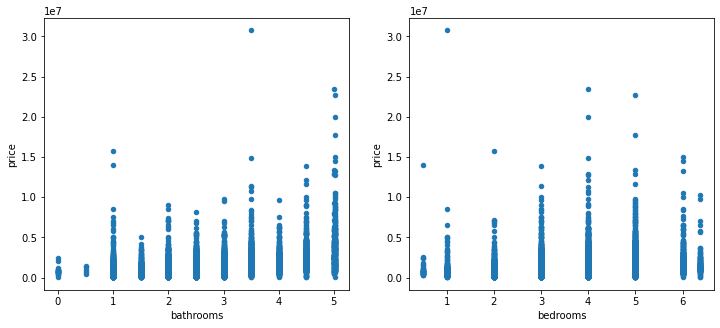

In [1511]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='bathrooms', y='price', ax=ax1)
df.plot.scatter(x='bedrooms', y='price', ax=ax2)

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

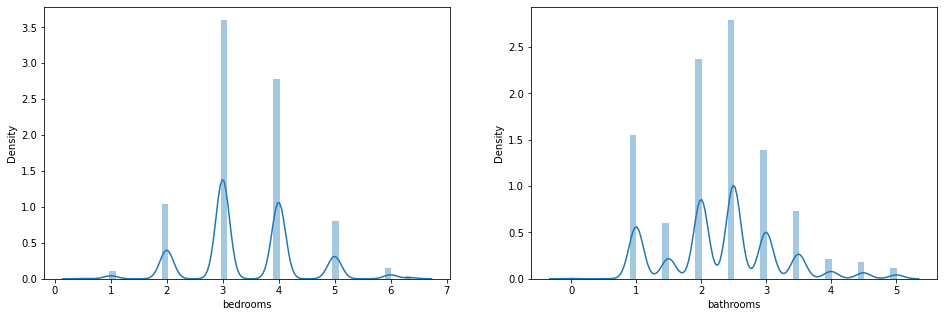

In [1512]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['bedrooms'])
plt.subplot(1,2,2)
sns.distplot(df['bathrooms'])

<AxesSubplot:xlabel='floors', ylabel='price'>

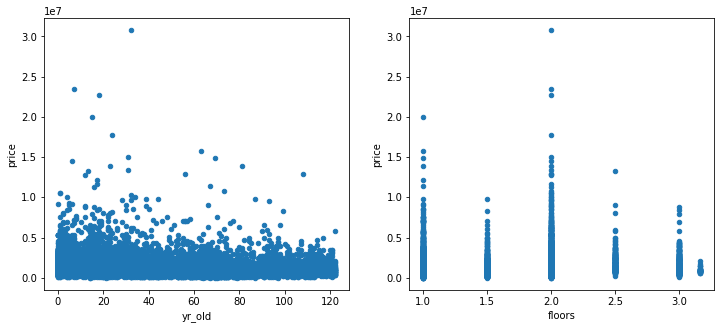

In [1513]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='yr_old', y='price', ax=ax1)
df.plot.scatter(x='floors', y='price', ax=ax2)

<AxesSubplot:xlabel='floors', ylabel='Density'>

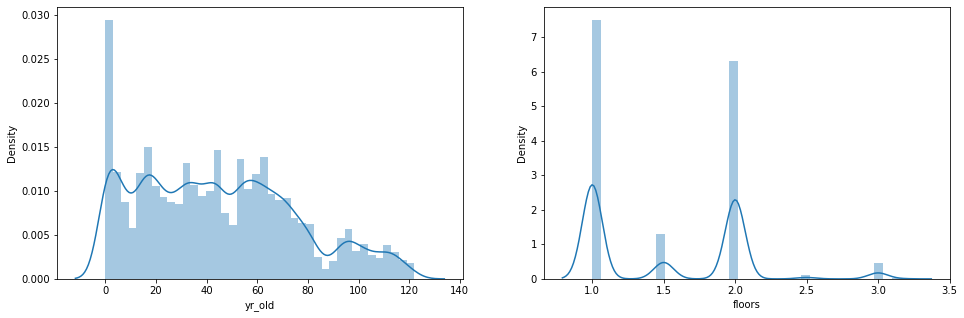

In [1514]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['yr_old'])
plt.subplot(1,2,2)
sns.distplot(df['floors'])

## Continuous numerice predictors

<AxesSubplot:xlabel='sqft_garage', ylabel='price'>

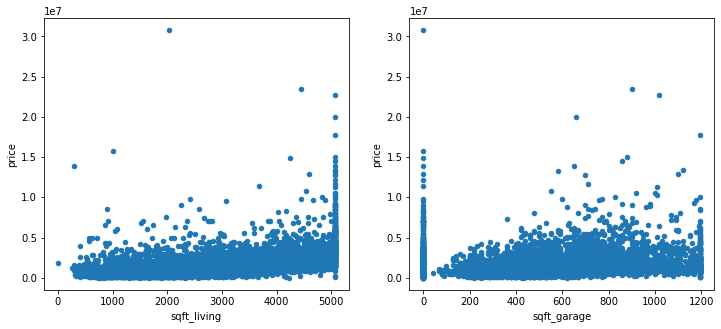

In [1515]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_living', y='price', ax=ax1)
df.plot.scatter(x='sqft_garage', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_garage', ylabel='Density'>

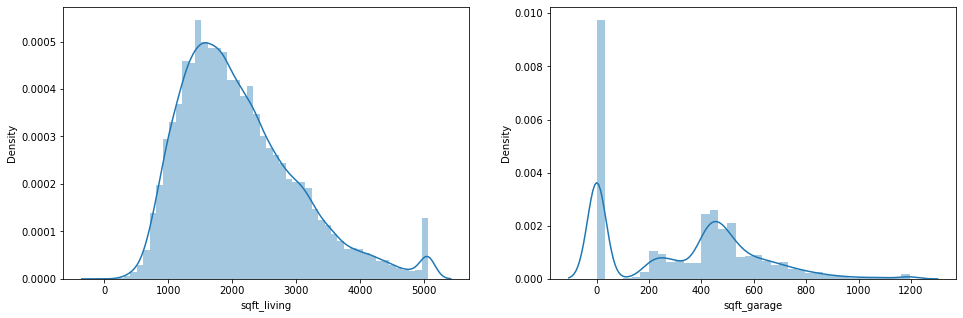

In [1516]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_living'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_garage'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

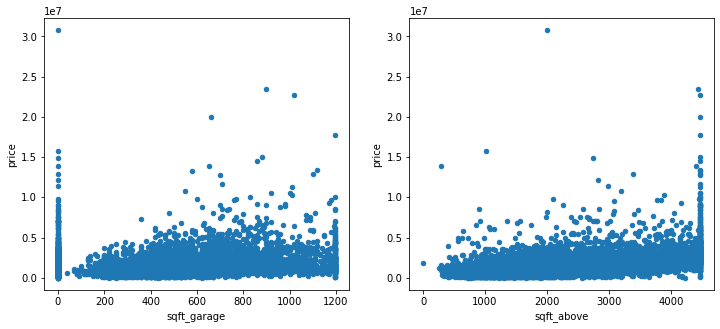

In [1517]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_garage', y='price', ax=ax1)
df.plot.scatter(x='sqft_above', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

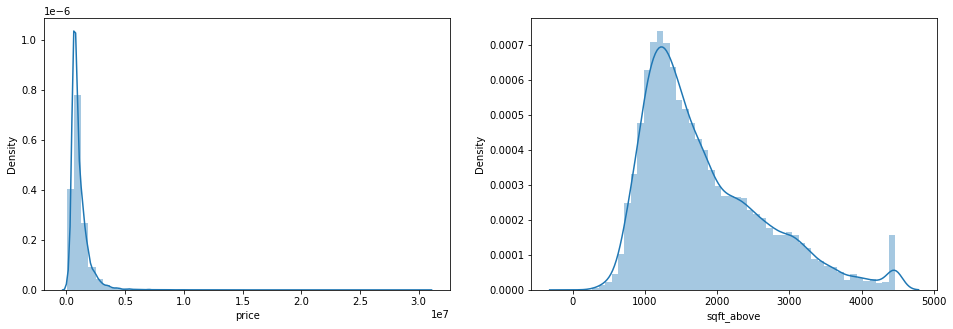

In [1518]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_above'])

<AxesSubplot:xlabel='sqft_patio', ylabel='price'>

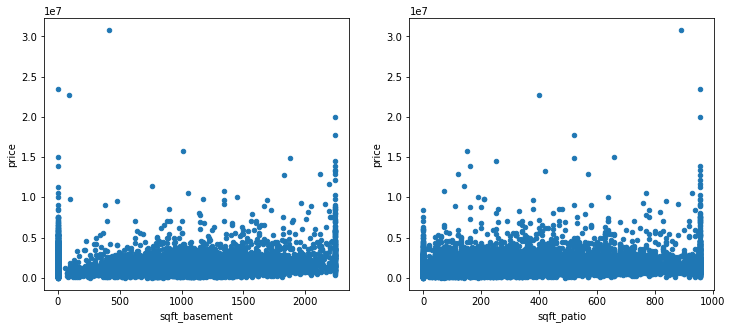

In [1519]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_basement', y='price', ax=ax1)
df.plot.scatter(x='sqft_patio', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

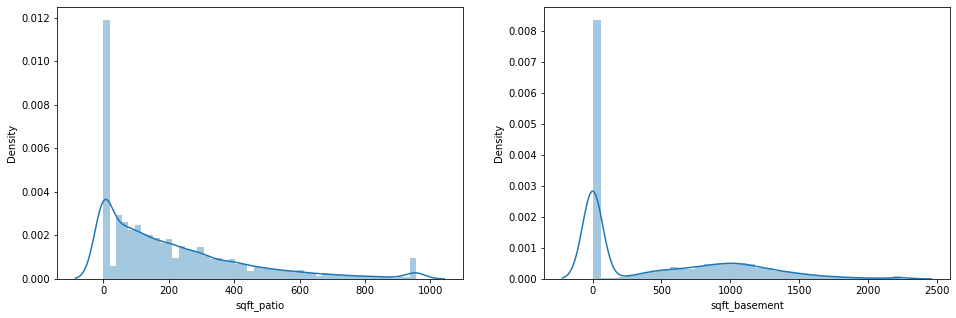

In [1520]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_patio'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_basement'])

Population looks like a discrete measure here.  We will go with sqft living as the most correlated to begin our greedy algorithm approach.

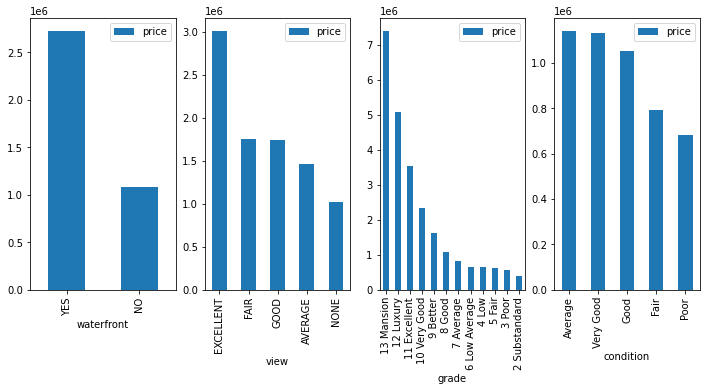

In [874]:
cats2 = ['waterfront', 'view', 'grade', 'condition']
fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
for index, feature in enumerate(cats2):
    df.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
        y='price', ax=axes[index])


There is some real symetry in the grade category.  As the grade increases, it appears that the average price of homes increases as well.  Good views and waterfront properties also seem correlated positively with price, which is understandable.  

In [649]:
# cats3 = ['nuisance', 'sewer_system', 'greenbelt']
# fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
# for index, feature in enumerate(cats3):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])

Not much can be gleaned from these bar charts.  

In [650]:
# plt.scatter(df1.sewer_system, df1.price)

In [651]:
# plt.scatter(df1.greenbelt, df1.price)

In [652]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='condition', y='price', ax=ax1)
# df1.sort_values(by='price', ascending=False).plot.scatter(x='view', y='price', ax=ax2)

In [653]:
# fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='grade', y='price', ax=ax)

## Attempts at some partial models.  

In [654]:
# y = df1.price
# X_iter = df1[['sqft_living', 'waterfront', 'grade']]

In [655]:
# X_iter = pd.get_dummies(X_iter, columns=['grade', 'waterfront'], drop_first=True)

In [656]:
# model = sm.OLS(y, sm.add_constant(X_iter))
# results = model.fit()
# print(results.summary())

In [657]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter)))
# mae

The explained variance is higher, but the MAE is worse than our baseline model.  This model is now off by about $359,121.21 for any given prediction.  We will need to adjust the model.  We will attempt some partial regressions below to see what stands out.   

## Partial regression of Grade, sqft_living, and waterfront

In [658]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

## Model and partial of Sqft Living, Waterfront, and View

In [ ]:
# y = df1.price
# X_iter2 = df1[['sqft_living', 'waterfront', 'view']]

In [ ]:
# X_iter2 = pd.get_dummies(X_iter2, columns=['view', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter2))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter2)))
# mae

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter2.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

While I feel strongly about sqft living, I am beginning to think view does not have much impact on price as we predicted.  Perhaps the relationship can be better explained by a term or some transformation.  

# Neighborhood

In [ ]:
# Neigh = ['Neighborhood']
# fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
# for index, feature in enumerate(Neigh):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=ax)


In [ ]:
# y = df1.price
# X_iter_Neigh = df1[['Neighborhood', 'sqft_living', 'waterfront']]
# X_iter_Neigh = pd.get_dummies(X_iter_Neigh, columns=['Neighborhood', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter_Neigh))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter_Neigh)))
# mae

Neighborhood really seems to explain a great deal about the variance in price, and it reduced our MAE down from our baseline.  Our predictions are now around $313,516.77 off by any given predictor.    

In [ ]:
# X_iter_Neigh

In [ ]:
# fig = plt.figure(figsize=(275,475))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter_Neigh.columns),
#     grid=(16,16),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
# # running our model with dummified predictors
# X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
#                        'sewer_system_PUBLIC RESTRICTED', 'yr_built', 'sqft_above', 'bathrooms',
#                       'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
#                       'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
#                       'Neighborhood_Baring' ], axis=1)
# y=dum_df1.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [ ]:
# baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
# # baseline_mae

In [ ]:
# dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [ ]:
# dum_df1.columns

Drop columns not correlated.  per gp 9-19.  

In [ ]:
# plt.hist(df1.price)

In [ ]:
# sns.distplot(df1.price, bins=30, kde=True)

## Cleaning data

applying a function to remove outliers outside 3 standard deviations

## Bedrooms

In [ ]:
# here we remove outliers by adding them to the highest, most relevant category, thus preserving data.  
df1.bathrooms.value_counts()

In [ ]:
df1.describe()

In [ ]:
# df1.loc[(df1['bedrooms'] > 6) & (df1['bathrooms'] > 6)]

In [ ]:
df1.bathrooms.value_counts()

Anything with zero bathrooms is suspect. 

In [ ]:
# df1.loc[df1['bathrooms'] < 1] = 1
# df1.loc[df1['bathrooms'] > 6] = 6

In [ ]:
# def change_value(condition): 
#     new_living = df1.sqft_living = np.sum(df1.sqft_living, (df1.sqft_garage*.75))
#     new_garage = df1.sqft_garage = np.subtract(df1.sqft_garage, (df1.sqft_garage*.75))
#     if condition == df1.loc[df1['sqft_garage'] > ['sqft_living']]:
#         return new_living, new_garage

In [ ]:
# df1.sqft_garage.apply(change_value)

In [ ]:
# X_iter

In [ ]:
# iter_model = sm.OLS(y, sm.add_constant(X_iter))
# iter_results = iter_model.fit()
# print(iter_results.summary())

In [ ]:
# iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
# iter_mae

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [ ]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
sns.heatmap(X.corr())

ccpr function partial 

In [ ]:
# df1['Neighborhood'].value_counts()

In [ ]:
# sns.heatmap(X.corr())

In [ ]:
# df1.heat_source

In [671]:
# # reading in the King County dataset to Pandas
# df_income = pd.read_csv('data/income.csv', index_col=1, skiprows=2)
# # df_income = df_income.drop(columns=['04000US53'], axis=1)

In [673]:
# df_income

In [674]:
# inc = {}

In [675]:
# inc = df_income.T
# inc

In [676]:
# df

In [677]:
# Out = df.[[x for x in df.columns if x not in included]]
# cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'city', 'grade']]
# cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'city', 'grade']]

In [678]:
# Out = [city_Kirkland,
# yr_old
# city_Lakeland North
# city_Cottage Lake
# city_Ames Lake
# city_Fairwood
# city_Issaquah
# city_North Bend
# city_Puyallup
# city_Preston
# city_Spanaway
# city_Hobart
# city_Sammamish
# condition_Poor
# city_Union Hill-Novelty Hill
# city_White Center
# city_Eatonville
# city_Baring
# city_Snoqualmie Pass
# city_35th Ave SW & SW Holden
# city_Snohomish
# city_Marysville
# city_Arlington
# city_Snoqualmie
# city_Redmond

In [679]:
# X1=dum_df.drop(labels=Out, axis=1)
# # y=dum_df.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

In [313]:
# X1 = X1.isin(included)

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

Took the above code from https://www.datasklr.com/ols-least-squares-regression/variable-selection. 

MAE dropped significantly.  

## Addressing Multicolinerity

In [312]:
X1.corr()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [680]:
abs(X1.corr()) > .75

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
grade_6 Low Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
grade_7 Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
grade_8 Good,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [681]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.881737
"(sqft_living, bathrooms)",0.767852


## TEST without cleaning after baseline

In [ ]:
# X1.drop(columns=['yr_built'], inplace=True)

There are three sets of variables that are highly correlated: yr_old and yr_built, sqft_above
and sqft_living, and bathrooms with sqft_living

### Final Model

# section_3

In [ ]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard', 'Neighborhood_Enumclaw', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

 [section_1](#section_1)


[section_2](#section_2)

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

In [ ]:
# reading in the King County dataset to Pandas
df_dem = pd.read_csv('data/Points_of_Interest.csv')
df_dem

In [ ]:
df_dem.drop(labels='OBJECTID', axis=1, inplace=True)

In [ ]:


# import geopandas
# import folium
# from shapely.geometry import Point, LineString, Polygon
# df_dem = geopandas.read_file('data/Points_of_Interest.csv')
# df_dem.head()
# # df_dem.head(20)

In [ ]:
# grid_polygon = df_dem

# gdf = geopandas.GeoDataFrame(
#     df_dem, geometry=geopandas.points_from_xy(df_dem.X, df_dem.Y))

# geo_df_filtered = gdf.loc[gdf.within(grid_polygon)]

In [ ]:
# = df_dem[df_dem['CODE'] == 330 & ]
# df_dem = df_dem[df_dem['geometry'].apply(lambda x : x.type!='Point')]

In [ ]:
df_dem.info()

In [ ]:
rename_zip = {'ZIPCODE':'Zipcode'}
df_dem.rename(columns=rename_zip, inplace=True)

In [ ]:
rename_long = {'X': 'long'}
rename_lat = {'Y': 'lat'}


In [ ]:
df_dem.rename(columns=rename_long, inplace=True)
df_dem.rename(columns=rename_lat, inplace=True)

In [ ]:
# df1 = df1.merge(df_dem, how='outer', left_on=['Zipcode', 'lat', 'long'], right_on=['Zipcode', 'lat', 'long'])



In [ ]:
df1.info()

In [ ]:
hosp = (df_dem['CODE'] == 330)
Nohosp = (df_dem['CODE'] != 330)

In [ ]:
df.loc[hosp, 'near_Hospital'] = df.loc[hosp, 'Zipcode']
df.loc[Nohosp, 'near_Hospital'] = df.loc[Nohosp, 'Zipcode']

In [ ]:
hosp = np.where((df_dem['CODE'] == 330 & df_dem['Zipcode' == 1], 1,
                 np.where((df_dem['CODE'] != 330) & df1['Zipcode'] == False), 0,))
                 


In [ ]:
s = geopandas.GeoSeries(
    [
        Point(0, 0),
        LineString([(1, -1), (1, 0), (2, 0), (2, 1)]),
        Polygon([(3, -1), (4, 0), (3, 1)]),
    ]
)

## terms and transformations

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(go.Scattergeo())
# fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(go.Scattergeo())
# fig.update_geos(
#     resolution=50,
#     showcoastlines=True, coastlinecolor="RebeccaPurple",
#     showland=True, landcolor="LightGreen",
#     showocean=True, oceancolor="LightBlue",
#     showlakes=True, lakecolor="Blue",
#     showrivers=True, rivercolor="Blue"
# )
# fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [ ]:
import geopandas

## Conclusion